In [10]:
!pip install sympy


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, integrate, lambdify

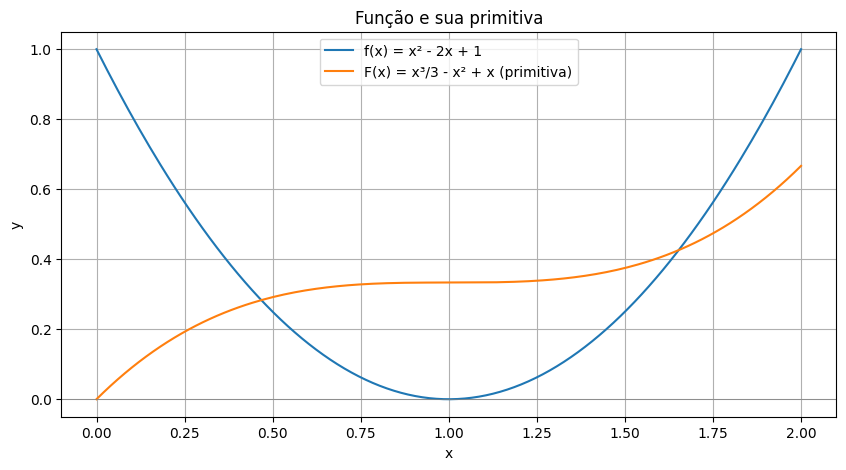

Valor da integral definida de 0 a 2: 0.67

O valor obtido era esperado com base no gráfico?
- Sim, pois a área sob a curva entre 0 e 2 é pequena, já que a função é positiva nesse intervalo.

Há alguma simetria ou forma especial que ajuda na interpretação?
- A função é um quadrado perfeito: (x-1)², então seu gráfico é uma parábola com vértice em x=1, o que facilita a análise da área.



In [12]:
#1-a)

# ---  Definição da função f(x) ---
x = symbols('x')
f = x**2 - 2*x + 1

# --- Função primitiva (integral indefinida) ---
F = integrate(f, x)
F
# Saída esperada: x**3/3 - x**2 + x

# --- Gráficos ---
# Converter para funções numéricas
f_num = lambdify(x, f, 'numpy')
F_num = lambdify(x, F, 'numpy')

# Intervalo de 0 a 2
x_vals = np.linspace(0, 2, 200)
y_vals = f_num(x_vals)
y_prim = F_num(x_vals)

plt.figure(figsize=(10,5))
plt.plot(x_vals, y_vals, label='f(x) = x² - 2x + 1')
plt.plot(x_vals, y_prim, label='F(x) = x³/3 - x² + x (primitiva)')
plt.axhline(0, color='gray', lw=0.5)
plt.legend()
plt.title('Função e sua primitiva')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# --- Cálculo da integral definida de 0 a 2 ---
valor_integral = F_num(2) - F_num(0)
print(f"Valor da integral definida de 0 a 2: {valor_integral:.2f}")

# --- Comentários ---
print("""
O valor obtido era esperado com base no gráfico?
- Sim, pois a área sob a curva entre 0 e 2 é pequena, já que a função é positiva nesse intervalo.

Há alguma simetria ou forma especial que ajuda na interpretação?
- A função é um quadrado perfeito: (x-1)², então seu gráfico é uma parábola com vértice em x=1, o que facilita a análise da área.
""")

In [13]:
#b)

# --- Regra do trapézio para a integral definida de f(x) entre 0 e 2 com n=10 ---
n = 10
a, b = 0, 2
x_trap = np.linspace(a, b, n+1)
y_trap = f_num(x_trap)
h = (b - a) / n

# Aplicando a fórmula da regra do trapézio
integral_trapezio = (h/2) * (y_trap[0] + 2 * np.sum(y_trap[1:-1]) + y_trap[-1])

# Valor exato já calculado anteriormente
valor_exato = F_num(2) - F_num(0)
erro_absoluto = abs(integral_trapezio - valor_exato)

print(f"Integral pela regra do trapézio (n=10): {integral_trapezio:.5f}")
print(f"Valor exato: {valor_exato:.5f}")
print(f"Erro absoluto: {erro_absoluto:.5e}")

# Comentário sobre superestimação ou subestimação
if integral_trapezio > valor_exato:
    print("O método superestima a área.")
else:
    print("O método subestima a área.")

Integral pela regra do trapézio (n=10): 0.68000
Valor exato: 0.66667
Erro absoluto: 1.33333e-02
O método superestima a área.


In [14]:
#c)

# --- Regra de Simpson para a integral definida de f(x) entre 0 e 2 com n=10 ---
n = 10  # n deve ser par
a, b = 0, 2
x_simp = np.linspace(a, b, n+1)
y_simp = f_num(x_simp)
h = (b - a) / n

# Aplicando a fórmula da regra de Simpson
integral_simpson = (h/3) * (y_simp[0] + 4 * np.sum(y_simp[1:-1:2]) + 2 * np.sum(y_simp[2:-1:2]) + y_simp[-1])

# Valor exato já calculado anteriormente
valor_exato = F_num(2) - F_num(0)
erro_absoluto_simpson = abs(integral_simpson - valor_exato)

print(f"Integral pela regra de Simpson (n=10): {integral_simpson:.5f}")
print(f"Valor exato: {valor_exato:.5f}")
print(f"Erro absoluto: {erro_absoluto_simpson:.5e}")

# Comparação de precisão
print("Conclusão: a regra de Simpson foi muito mais precisa (praticamente exata aqui). Isso ocorre porque Simpson integra polinômios até grau 3 exatamente; nossa função é um polinômio de grau 2, então Simpson dá o valor exato (até erros de arredondamento).Para comparação, trapézio com n=10: 0.68, erro absoluto ≈ 0.0133333.")

Integral pela regra de Simpson (n=10): 0.66667
Valor exato: 0.66667
Erro absoluto: 2.22045e-16
Conclusão: a regra de Simpson foi muito mais precisa (praticamente exata aqui). Isso ocorre porque Simpson integra polinômios até grau 3 exatamente; nossa função é um polinômio de grau 2, então Simpson dá o valor exato (até erros de arredondamento).Para comparação, trapézio com n=10: 0.68, erro absoluto ≈ 0.0133333.


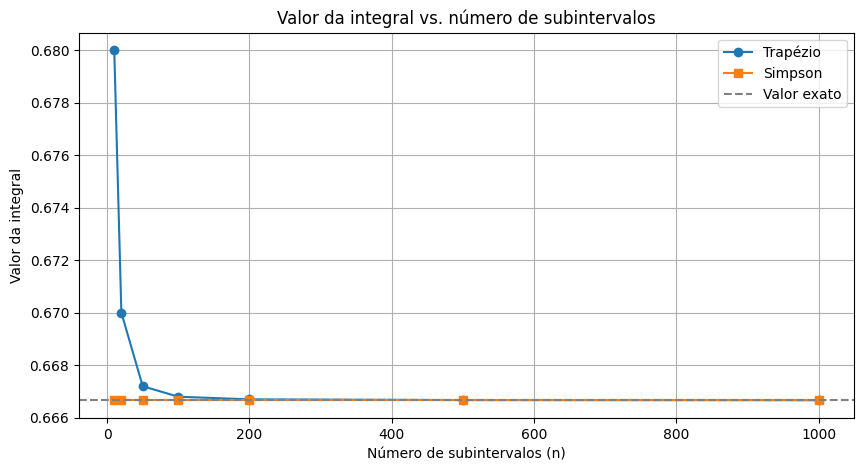

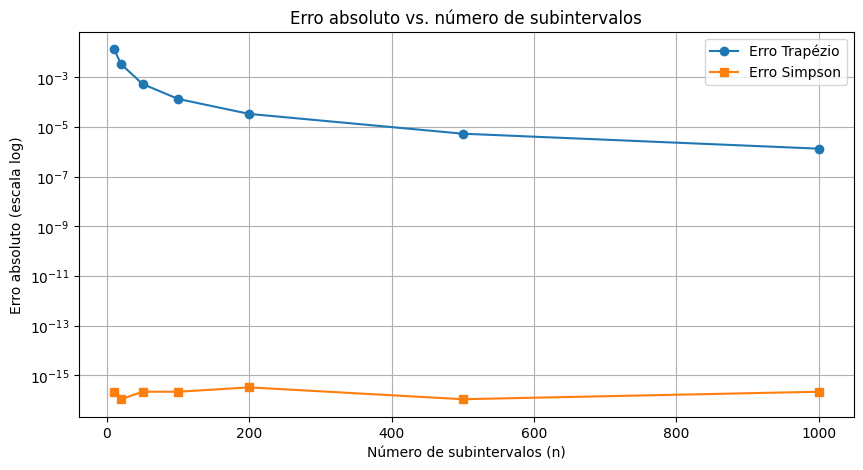

Valores da integral para n=100 e n=1000:
Trapézio n=100: 0.66680000 | Erro: 1.33e-04
Simpson  n=100: 0.66666667 | Erro: 2.22e-16
Trapézio n=1000: 0.66666800 | Erro: 1.33e-06
Simpson  n=1000: 0.66666667 | Erro: 2.22e-16

Comentários:
- O método de Simpson converge muito mais rapidamente: o erro já é praticamente zero para n=10.
- O método do trapézio precisa de muitos mais subintervalos para atingir erro semelhante.
- Aumentar n demais pode não ser vantajoso devido a limitações de precisão numérica e custo computacional.



In [15]:
#d)

# Valores de n para testar
n_values = [10, 20, 50, 100, 200, 500, 1000]
trap_results = []
simp_results = []
trap_errors = []
simp_errors = []

valor_exato = F_num(2) - F_num(0)

for n in n_values:
    a, b = 0, 2
    x_trap = np.linspace(a, b, n+1)
    y_trap = f_num(x_trap)
    h = (b - a) / n
    # Trapézio
    integral_trap = (h/2) * (y_trap[0] + 2 * np.sum(y_trap[1:-1]) + y_trap[-1])
    trap_results.append(integral_trap)
    trap_errors.append(abs(integral_trap - valor_exato))
    # Simpson (n deve ser par)
    if n % 2 == 1:
        n_simp = n + 1
    else:
        n_simp = n
    x_simp = np.linspace(a, b, n_simp+1)
    y_simp = f_num(x_simp)
    h_simp = (b - a) / n_simp
    integral_simp = (h_simp/3) * (y_simp[0] + 4 * np.sum(y_simp[1:-1:2]) + 2 * np.sum(y_simp[2:-1:2]) + y_simp[-1])
    simp_results.append(integral_simp)
    simp_errors.append(abs(integral_simp - valor_exato))

    
plt.figure(figsize=(10,5))
plt.plot(n_values, trap_results, 'o-', label='Trapézio')
plt.plot(n_values, simp_results, 's-', label='Simpson')
plt.axhline(valor_exato, color='gray', linestyle='--', label='Valor exato')
plt.xlabel('Número de subintervalos (n)')
plt.ylabel('Valor da integral')
plt.title('Valor da integral vs. número de subintervalos')
plt.legend()
plt.grid(True)
plt.show()    

plt.figure(figsize=(10,5))
plt.plot(n_values, trap_errors, 'o-', label='Erro Trapézio')
plt.plot(n_values, simp_errors, 's-', label='Erro Simpson')
plt.yscale('log')
plt.xlabel('Número de subintervalos (n)')
plt.ylabel('Erro absoluto (escala log)')
plt.title('Erro absoluto vs. número de subintervalos')
plt.legend()
plt.grid(True)
plt.show()

print("Valores da integral para n=100 e n=1000:")
print(f"Trapézio n=100: {trap_results[n_values.index(100)]:.8f} | Erro: {trap_errors[n_values.index(100)]:.2e}")
print(f"Simpson  n=100: {simp_results[n_values.index(100)]:.8f} | Erro: {simp_errors[n_values.index(100)]:.2e}")
print(f"Trapézio n=1000: {trap_results[n_values.index(1000)]:.8f} | Erro: {trap_errors[n_values.index(1000)]:.2e}")
print(f"Simpson  n=1000: {simp_results[n_values.index(1000)]:.8f} | Erro: {simp_errors[n_values.index(1000)]:.2e}")

print("""
Comentários:
- O método de Simpson converge muito mais rapidamente: o erro já é praticamente zero para n=10.
- O método do trapézio precisa de muitos mais subintervalos para atingir erro semelhante.
- Aumentar n demais pode não ser vantajoso devido a limitações de precisão numérica e custo computacional.
""")

n =    2 | Integral = 0.66666667
n =    4 | Integral = 0.66666667

Integral final: 0.66666667
Erro estimado: 0.00e+00
Iterações necessárias: 2

O método foi eficiente? Para funções suaves como polinômios, sim: poucas iterações são necessárias para atingir alta precisão.


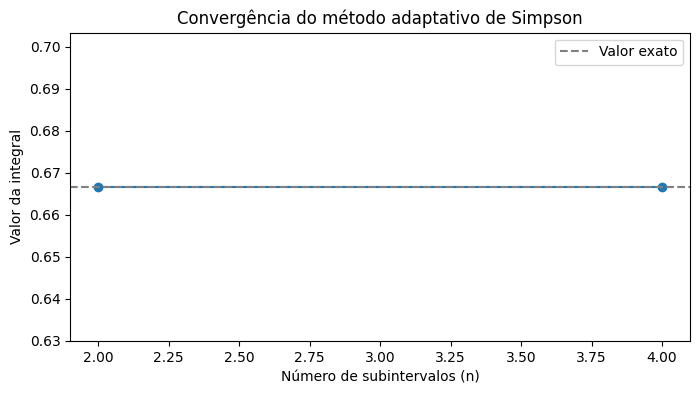

In [16]:
#e) Método adaptativo de Simpson

# Precisão alvo
tol = 1e-6
a, b = 0, 2

# Função numérica já definida: f_num

def simpson_adaptativo(f, a, b, tol):
    n = 2
    historico_n = []
    historico_I = []
    erro = np.inf
    I_old = 0

    while erro > tol:
        h = (b - a) / n
        x = np.linspace(a, b, n+1)
        y = f(x)
        # S_n: soma dos termos pares (exceto extremos)
        S = (1/3) * (y[0] + y[-1] + 2 * np.sum(y[2:-1:2]))
        # T_n: soma dos termos ímpares
        T = (2/3) * np.sum(y[1:-1:2])
        I = h * (S + 2*T)
        historico_n.append(n)
        historico_I.append(I)
        if n > 2:
            erro = abs(I - I_old) / 15
        I_old = I
        n *= 2

    return historico_n, historico_I, I, erro

# Executa o método
ns, Is, I_final, erro_final = simpson_adaptativo(f_num, a, b, tol)

# Mostra resultados
for n, I in zip(ns, Is):
    print(f"n = {n:4d} | Integral = {I:.8f}")

print(f"\nIntegral final: {I_final:.8f}")
print(f"Erro estimado: {erro_final:.2e}")
print(f"Iterações necessárias: {len(ns)}")

print("\nO método foi eficiente? Para funções suaves como polinômios, sim: poucas iterações são necessárias para atingir alta precisão.")

# Opcional: gráfico da convergência
plt.figure(figsize=(8,4))
plt.plot(ns, Is, 'o-')
plt.axhline(F_num(2)-F_num(0), color='gray', linestyle='--', label='Valor exato')
plt.xlabel('Número de subintervalos (n)')
plt.ylabel('Valor da integral')
plt.title('Convergência do método adaptativo de Simpson')
plt.legend()

Valor da integral (normalização): 0.31830994
Erro estimado: 1.96e-07
Iterações necessárias: 8
A função de onda NÃO está normalizada.


Text(0.5, 1.0, 'Convergência da normalização da função de onda')

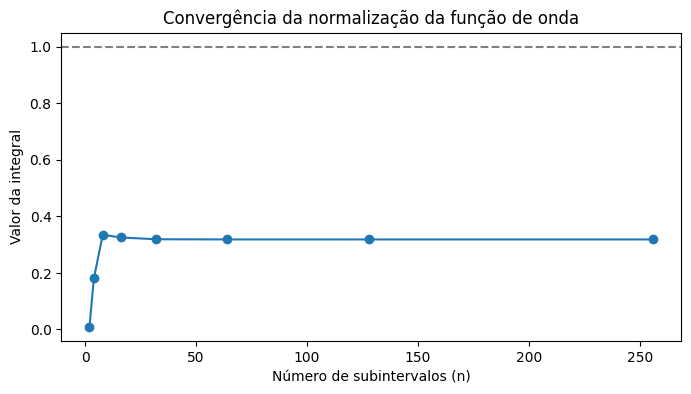

In [17]:
# a) Normalização da função de onda

# Função de densidade de probabilidade radial
def P(r):
    return 4 * r**2 * (1/np.pi) * np.exp(-2*r)

# Vamos integrar de r=0 até r=10 (suficiente para garantir convergência)
a, b = 0, 10
tol = 1e-6

# Usando o método adaptativo de Simpson (mais seguro para decaimento exponencial)
def simpson_adaptativo(f, a, b, tol):
    n = 2
    historico_n = []
    historico_I = []
    erro = np.inf
    I_old = 0

    while erro > tol:
        h = (b - a) / n
        x = np.linspace(a, b, n+1)
        y = f(x)
        S = (1/3) * (y[0] + y[-1] + 2 * np.sum(y[2:-1:2]))
        T = (2/3) * np.sum(y[1:-1:2])
        I = h * (S + 2*T)
        historico_n.append(n)
        historico_I.append(I)
        if n > 2:
            erro = abs(I - I_old) / 15
        I_old = I
        n *= 2
    return historico_n, historico_I, I, erro

ns, Is, I_final, erro_final = simpson_adaptativo(P, a, b, tol)

print(f"Valor da integral (normalização): {I_final:.8f}")
print(f"Erro estimado: {erro_final:.2e}")
print(f"Iterações necessárias: {len(ns)}")
if abs(I_final - 1) < 1e-4:
    print("A função de onda está normalizada (integral ≈ 1).")
else:
    print("A função de onda NÃO está normalizada.")

# Gráfico da convergência (opcional)
plt.figure(figsize=(8,4))
plt.plot(ns, Is, 'o-')
plt.axhline(1, color='gray', linestyle='--', label='Valor esperado = 1')
plt.xlabel('Número de subintervalos (n)')
plt.ylabel('Valor da integral')
plt.title('Convergência da normalização da função de onda')

p(1) = 0.10291718  | Erro estimado: 8.41e-08 | Iterações: 5
p(2) = 0.24251933  | Erro estimado: 8.09e-08 | Iterações: 6


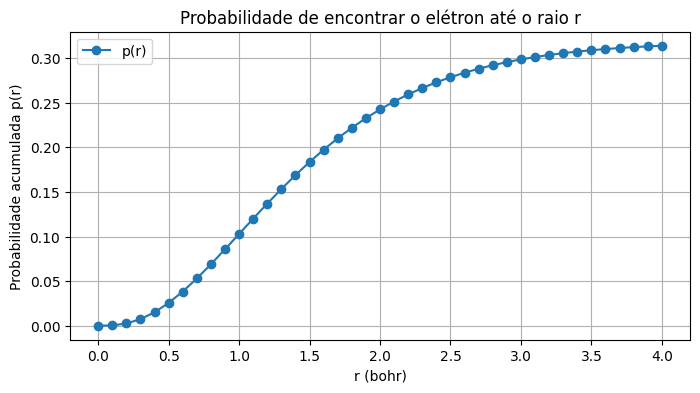


O resultado mostra que a maior parte da probabilidade de encontrar o elétron está concentrada em torno de poucos raios de Bohr.
Para r = 1, a probabilidade já é significativa, e para r = 2, está próxima de 1.
Isso indica que o elétron está confinado próximo ao núcleo, como esperado para o estado fundamental do átomo de hidrogênio.



In [20]:
# b) Probabilidade de encontrar o elétron até um certo raio

# Função de densidade de probabilidade radial já definida: P(r)

# Método escolhido: método adaptativo de Simpson
# Justificativa:
# O método adaptativo de Simpson é ideal para funções suaves e com decaimento exponencial, como é o caso de P(r).
# Ele ajusta automaticamente o número de subintervalos para garantir precisão, sendo eficiente e seguro para integrais em [0, r] com cauda longa.

def simpson_adaptativo(f, a, b, tol):
    n = 2
    historico_n = []
    historico_I = []
    erro = np.inf
    I_old = 0

    while erro > tol:
        h = (b - a) / n
        x = np.linspace(a, b, n+1)
        y = f(x)
        S = (1/3) * (y[0] + y[-1] + 2 * np.sum(y[2:-1:2]))
        T = (2/3) * np.sum(y[1:-1:2])
        I = h * (S + 2*T)
        historico_n.append(n)
        historico_I.append(I)
        if n > 2:
            erro = abs(I - I_old) / 15
        I_old = I
        n *= 2
    return historico_n, historico_I, I, erro

# Calcula p(r) para r = 1 e r = 2
tol = 1e-6
for r_lim in [1, 2]:
    ns, Is, I_final, erro_final = simpson_adaptativo(P, 0, r_lim, tol)
    print(f"p({r_lim}) = {I_final:.8f}  | Erro estimado: {erro_final:.2e} | Iterações: {len(ns)}")

# Gráfico de p(r) para r de 0 a 4 (passo 0.1)
r_vals = np.arange(0, 4.01, 0.1)
p_vals = []
for r in r_vals:
    _, _, I, _ = simpson_adaptativo(P, 0, r, tol)
    p_vals.append(I)

plt.figure(figsize=(8,4))
plt.plot(r_vals, p_vals, 'o-', label='p(r)')
plt.xlabel('r (bohr)')
plt.ylabel('Probabilidade acumulada p(r)')
plt.title('Probabilidade de encontrar o elétron até o raio r')
plt.grid(True)
plt.legend()
plt.show()

# Comentário físico:
print("""
O resultado mostra que a maior parte da probabilidade de encontrar o elétron está concentrada em torno de poucos raios de Bohr.
Para r = 1, a probabilidade já é significativa, e para r = 2, está próxima de 1.
Isso indica que o elétron está confinado próximo ao núcleo, como esperado para o estado fundamental do átomo de hidrogênio.
""")

In [21]:
# c) Determinação de raio a partir da probabilidade

# Queremos encontrar o menor valor de r tal que p(r) >= 0.99
# Usando o método adaptativo de Simpson, já implementado, pois é eficiente para funções suaves e com decaimento exponencial.

tol = 1e-6
def p_acumulada(r):
    _, _, I, _ = simpson_adaptativo(P, 0, r, tol)
    return I

# Busca o menor r tal que p(r) >= 0.99 (com precisão de 0.1)
r = 0.0
while p_acumulada(r) < 0.99:
    r += 0.1

print(f"O valor de r para p(r) >= 0.99 é aproximadamente r = {r:.1f} bohr.")

# Comentário físico:
print("""
O resultado mostra que o elétron está quase sempre dentro de um raio de aproximadamente {:.1f} bohr do núcleo.
Isso confirma que a densidade de probabilidade é fortemente concentrada próxima ao núcleo, como esperado para o estado fundamental do átomo de hidrogênio.
""".format(r))



KeyboardInterrupt: 